In [115]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [116]:
company = 'SQ'

start = dt.datetime(2012,1,1)
end = dt.datetime(2021,5,5)

data = web.DataReader(company, 'yahoo', start, end)

In [117]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))


In [118]:
prediction_days = 60
x_train = []
y_train = []
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [119]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [120]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
42/42 [==============================] - 9s 108ms/step - loss: 0.0137
Epoch 2/25
42/42 [==============================] - 5s 110ms/step - loss: 0.0027
Epoch 3/25
42/42 [==============================] - 5s 115ms/step - loss: 0.0057
Epoch 4/25
42/42 [==============================] - 5s 107ms/step - loss: 0.0020
Epoch 5/25
42/42 [==============================] - 5s 108ms/step - loss: 0.0017
Epoch 6/25
42/42 [==============================] - 5s 108ms/step - loss: 0.0024
Epoch 7/25
42/42 [==============================] - 5s 108ms/step - loss: 0.0018
Epoch 8/25
42/42 [==============================] - 5s 110ms/step - loss: 0.0017
Epoch 9/25
42/42 [==============================] - 5s 109ms/step - loss: 0.0027
Epoch 10/25
42/42 [==============================] - 5s 108ms/step - loss: 0.0017
Epoch 11/25
42/42 [==============================] - 5s 108ms/step - loss: 0.0016
Epoch 12/25
42/42 [==============================] - 5s 108ms/step - loss: 0.0017
Epoch 13/25
42/42 [======

In [121]:
test_start = dt.datetime(2021,5,5)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [122]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [123]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [124]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

Text(0, 0.5, 'Share Price')

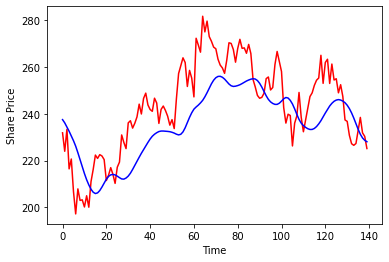

In [125]:
plt.plot(actual_prices, color='red', label='Actual price')
plt.plot(predicted_prices, color='blue', label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Share Price')